## Outline
 - [Get nodes from edges](##Who-are-the-nodes)
 - [Graph Construction with OOP](##OOP:-Construct-Graph)
 - [Recursive DFS Class](##UndirectedDFS)
 - [Connected Component Class](##Connected-Component)


In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## Who are the nodes
 - What are the distinct node name?

In [2]:
elist = [('A', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'D')]

In [3]:
sources = [s for s,t in elist]  # source node names
sources

['A', 'B', 'C', 'C']

In [4]:
targets = [t for s,t in elist] # target node names
targets

['B', 'C', 'A', 'D']

In [5]:
all_nodes = list(set(sources + targets))
all_nodes

['A', 'B', 'D', 'C']

## OOP: Construct Graph

In [6]:
class node():
    def __init__(self, node_name):
        self.node_name = node_name
        self.neighbors = [] # this holds instances of nodes (not node names)
        
    def neighbors_name(self):
        return [neighbor.node_name for neighbor in self.neighbors]
        
class graph():
    def __init__(self, elist):
        self.elist = elist
        sources = [s for s,t in self.elist]  # source node names
        targets = [t for s,t in self.elist] # target node names
        self.node_names = list(set(sources + targets))
        
        self.nodes = {name:node(name) for name in self.node_names}
        self.create_graph()
        
    def add_edge(self, s_name, t_name):
        self.nodes[s_name].neighbors.append(self.nodes[t_name])
        self.nodes[t_name].neighbors.append(self.nodes[s_name])
        
    def create_graph(self):
        for s,t in self.elist:
            self.add_edge(s,t)
            
    def info(self):
        return {s:node_s.neighbors_name() for s,node_s in self.nodes.items()}
    
    def draw(self, color = 'lightblue'):
        """
            Usage of networkx for visualisation
        """
        G = nx.Graph()
        G.add_edges_from(self.elist)
        plt.figure(figsize=(16,8))
        nx.draw(G, node_size=5000, node_color=color, with_labels=True)
       

In [7]:
elist

[('A', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'D')]

In [8]:
G = graph(elist)

In [9]:
G.info()

{'A': ['B', 'C'], 'B': ['A', 'C'], 'D': ['C'], 'C': ['B', 'A', 'D']}

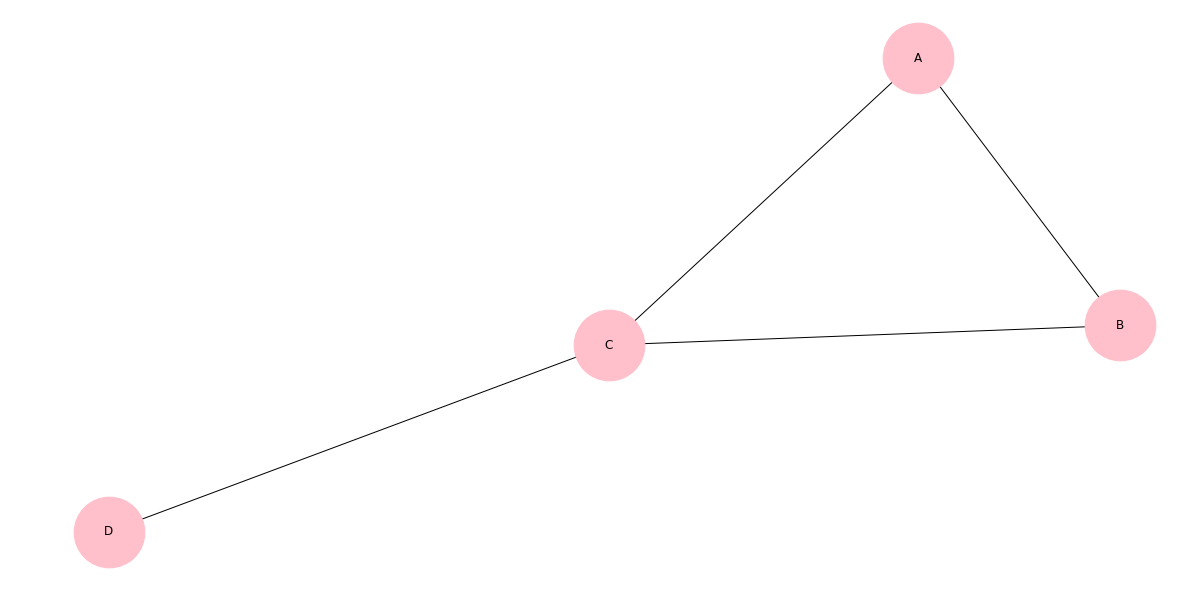

In [10]:
G.draw(color = 'pink')

## UndirectedDFS

In [11]:
class UndirectedDFS():
    def __init__(self, G):
        self.G = G
        self.visited = {node_name: False for node_name in self.G.node_names}
        self.traversal = []
        
    def dfs(self, sname):
        self.visited[sname] = True
        self.traversal.append(sname)
        for neighbor in self.G.nodes[sname].neighbors:
            if not self.visited[neighbor.node_name]:
                self.dfs(neighbor.node_name)

In [12]:
str_elist = """
0 6
0 2
0 1
3 5
4 5
4 6
0 5
3 4
7 8
9 11
9 10
11 12
9 12
"""
elist = [tuple(line.split(' ')) for line in str_elist.split('\n') if line != '']
elist

[('0', '6'),
 ('0', '2'),
 ('0', '1'),
 ('3', '5'),
 ('4', '5'),
 ('4', '6'),
 ('0', '5'),
 ('3', '4'),
 ('7', '8'),
 ('9', '11'),
 ('9', '10'),
 ('11', '12'),
 ('9', '12')]

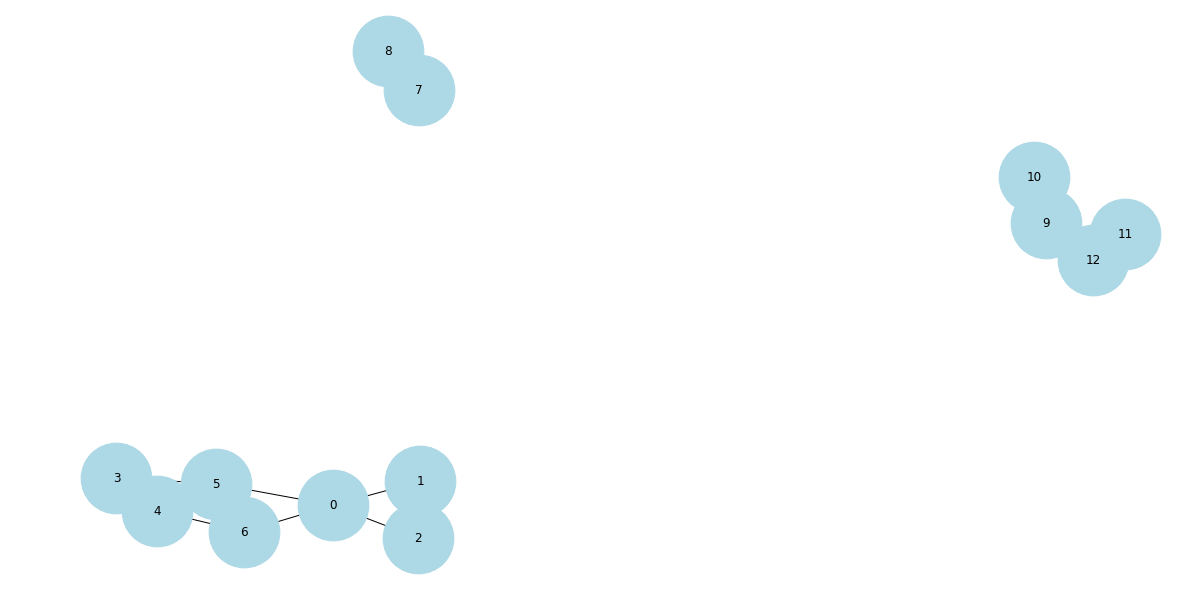

In [13]:
G = graph(elist)
G.draw(color = 'lightblue')

In [14]:
G.info()

{'3': ['5', '4'],
 '6': ['0', '4'],
 '1': ['0'],
 '8': ['7'],
 '5': ['3', '4', '0'],
 '12': ['11', '9'],
 '7': ['8'],
 '11': ['9', '12'],
 '10': ['9'],
 '9': ['11', '10', '12'],
 '4': ['5', '6', '3'],
 '0': ['6', '2', '1', '5'],
 '2': ['0']}

In [15]:
dfs = UndirectedDFS(G)
dfs.dfs('0')

In [16]:
dfs.traversal

['0', '6', '4', '5', '3', '2', '1']

## Connected Component

In [17]:
class ConnectedComponent():
    def __init__(self, G):
        self.G = G
        self.visited = {node_name: False for node_name in self.G.node_names}
        self.id = {}
        self.count = 0
        
        for node_name in self.G.node_names:
            if not self.visited[node_name]:
                self.dfs(node_name)
                self.count += 1
        
    def dfs(self, sname):
        self.visited[sname] = True
        self.id[sname] = self.count

        for neighbor in self.G.nodes[sname].neighbors:
            if not self.visited[neighbor.node_name]:
                self.dfs(neighbor.node_name)
                
    def inSameComponent(self, s,t):
        return self.id[s] == self.id[t]

In [18]:
compo = ConnectedComponent(G)
compo.id

{'3': 0,
 '5': 0,
 '4': 0,
 '6': 0,
 '0': 0,
 '2': 0,
 '1': 0,
 '8': 1,
 '7': 1,
 '12': 2,
 '11': 2,
 '9': 2,
 '10': 2}

### What is the number of Connected Components

In [19]:
max(compo.id.values()) + 1 # linear time

3

In [20]:
compo.count # constant time

3

### Are s = 5 and t = 7 are connected?

In [21]:
s, t = '5', '7'
print('Component Id of {} is {}'.format(s, compo.id[s]))
print('Component Id of {} is {}'.format(t, compo.id[t]))

Component Id of 5 is 0
Component Id of 7 is 1


In [22]:
def inSameComponent(s,t):
    print('Component Id of {} is {}'.format(s, compo.id[s]))
    print('Component Id of {} is {}'.format(t, compo.id[t]))
    return compo.id[s] == compo.id[t]

In [23]:
inSameComponent(s = '6',t = '4')

Component Id of 6 is 0
Component Id of 4 is 0


True

In [24]:
compo.inSameComponent(s = '6',t = '10')

False